In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.ensemble import VotingClassifier

In [2]:
directory = "C:\\Users\\Michael\\Desktop\\CS 185C\\Malware\\"

In [3]:
def load_samples(file):
    file = open(file, 'r')
    samples = []
    for line in file.readlines():
        numbers = np.array(list(map(lambda x : float(x), (re.sub("NaN|-Infinity", "-7",line[1:-2])).split(", "))))
        samples.append(numbers)
    file.close()
    return np.array(samples)

In [4]:
def load_cluster_samples(file):
    file = open(file, 'r')
    samples = []
    for line in file.readlines():
        numbers = np.array(list(map(lambda x : float(x), line[:-1].split(","))))
        samples.append(numbers)
    file.close()
    return np.array(samples)

In [5]:
def normalize_samples(samples):
    scaled_inputs = []
    for scores in samples:
        scaled_inputs.append(preprocessing.scale(scores))
    return np.array(scaled_inputs)


In [6]:
def balance_samples(scores, labels):
    count = 0
    for label in labels:
        if(label == 1):
            count += 1
    indicies_to_remove = []
    label_counter = 0
    
    for i in range(labels.shape[0]):
        if(labels[i] == -1):
            label_counter += 1
            if(label_counter > count):
                indicies_to_remove.append(i)
    scores = np.delete(scores, indicies_to_remove, axis=0)
    labels = np.delete(labels, indicies_to_remove, axis=0)
    
    return scores, labels

In [7]:
def run_SVM(training_scores, training_labels, degree):
    #print(unbalanced_training_scores.shape[1])
    """"
    training_scores, training_labels = shuffle(training_scores, training_labels)
    training_scores, training_labels = balance_samples(training_scores, training_labels)
    model = svm.SVC(kernel='poly', degree=degree, verbose=False)
    """
    
    model = svm.SVC(kernel='poly', degree=degree, verbose=False, decision_function_shape='ova')
    model.fit(training_scores, training_labels)
    predict = model.predict(training_scores)
    return metrics.accuracy_score(training_labels, predict), model

In [8]:
def remove_families(numbers, samples):
    samples_per_family = int(samples.shape[0] / 7)
    array = np.reshape(samples, (7, samples_per_family, 7, 9), order='C')#family, samples per family, families, model
    array = np.delete(array, numbers, 0)
    array = np.delete(array, numbers, 2)
    return np.reshape(array, (array.shape[0] * array.shape[1], array.shape[2]*array.shape[3]), order='C')

In [29]:
def subtract_lists(a, b):
    difference = []
    for element in a:
        if element not in b:
            difference.append(element)
    return difference

In [58]:
all_families = ["harebot", "cridex", "securityShield", "smarthdd", "zbot", "winwebsec", "zeroaccess"]
families_to_remove = []
families = subtract_lists(all_families, np.array(all_families)[families_to_remove])
#families = list(set(all_families) - set(np.array(all_families)[families_to_remove]))
print(families)

['harebot', 'cridex', 'securityShield', 'smarthdd', 'zbot', 'winwebsec', 'zeroaccess']


In [63]:
#""""
all_training = np.empty(shape=(294,0))
all_testing = np.empty(shape=(77,0))

training_labels = []
testing_labels = []


for family in set(all_families):
    training = load_samples(directory + "training scores\\{family} scores.txt".format(family=family))[:,1:]
    testing = load_samples(directory + "testing scores\\{family} scores.txt".format(family=family))[:,1:]
    
    all_training = np.concatenate((all_training, training), axis=1)
    all_testing = np.concatenate((all_testing, testing), axis=1)

training_scores = remove_families(families_to_remove, all_training)
testing_scores = remove_families(families_to_remove, all_testing)

#training_scores = normalize_samples(training_scores)
#testing_scores = normalize_samples(testing_scores)


####
cluster_training = load_cluster_samples(directory + "clustering\\output\\{} families train.txt". format(len(families)))
cluster_testing = load_cluster_samples(directory + "clustering\\output\\{} families test.txt". format(len(families)))

training_scores = normalize_samples(np.concatenate((training_scores, cluster_training), axis=1))
testing_scores = normalize_samples(np.concatenate((testing_scores, cluster_testing), axis=1))
####


for i in range(len(families)):
    num_train_samples = (int) (len(training_scores) / len(families))
    num_testing_samples = (int) (len(testing_scores) / len (families))
    for j in range(42):
        training_labels.append(i)
    for j in range(11):
        testing_labels.append(i)
print(training_scores.shape)
#""""

(294, 65)


In [64]:
x_val = []
y_val = []
for degree in range(1, 50, 1):
    accuracy, model = run_SVM(training_scores,training_labels,degree)

    predict = model.predict(testing_scores)
    accuracy = metrics.accuracy_score(testing_labels, predict)
    x_val.append(degree)
    y_val.append(accuracy)
    print(degree, accuracy)

1 0.8441558441558441
2 0.8571428571428571
3 0.8701298701298701
4 0.8701298701298701
5 0.8571428571428571
6 0.8961038961038961
7 0.8961038961038961
8 0.8961038961038961
9 0.8831168831168831
10 0.8701298701298701
11 0.8441558441558441
12 0.8311688311688312
13 0.8181818181818182
14 0.8181818181818182
15 0.8181818181818182
16 0.8181818181818182
17 0.8051948051948052
18 0.8051948051948052
19 0.8051948051948052
20 0.8051948051948052
21 0.8051948051948052
22 0.8051948051948052
23 0.8051948051948052
24 0.7922077922077922
25 0.7792207792207793
26 0.7792207792207793
27 0.7792207792207793
28 0.7792207792207793
29 0.7792207792207793
30 0.7662337662337663
31 0.7532467532467533
32 0.7532467532467533
33 0.7662337662337663
34 0.7662337662337663
35 0.7402597402597403
36 0.7402597402597403
37 0.7402597402597403
38 0.7402597402597403
39 0.7402597402597403
40 0.7402597402597403
41 0.7272727272727273
42 0.7272727272727273
43 0.7272727272727273
44 0.7272727272727273
45 0.7142857142857143
46 0.71428571428571

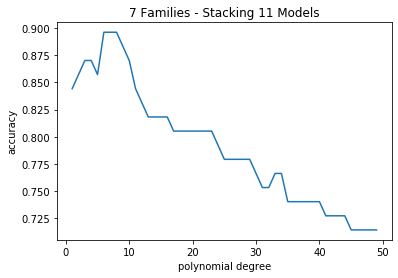

In [65]:
plt.plot(x_val, y_val)
plt.ylabel('accuracy')
plt.xlabel('polynomial degree')
plt.title("{} Families - Stacking {} Models".format(len(families), 2 + (int) (training_scores.shape[1]/len(families))))
plt.show()

In [67]:
accuracy, model = run_SVM(training_scores,training_labels,8)
predict = model.predict(testing_scores)
confusion_matrix = metrics.confusion_matrix(predict, testing_labels)
print(testing_labels)
for family in families:
    print(family)
print(confusion_matrix)
print('\n'.join([''.join(['{}\n'.format(item) for item in row]) 
      for row in np.transpose(confusion_matrix)]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
harebot
cridex
securityShield
smarthdd
zbot
winwebsec
zeroaccess
[[11  3  0  0  0  0  0]
 [ 0  8  0  0  3  0  0]
 [ 0  0 11  0  1  1  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0 11]]
11
0
0
0
0
0
0

3
8
0
0
0
0
0

0
0
11
0
0
0
0

0
0
0
11
0
0
0

0
3
1
0
7
0
0

0
0
1
0
0
10
0

0
0
0
0
0
0
11



In [68]:
accuracy, model = run_SVM(training_scores,training_labels,8)
predict_training = model.predict(training_scores)
predict_testing = model.predict(testing_scores)

combined_training = np.concatenate((cluster_training, np.reshape(predict_training, (len(predict_training), 1))), axis=1)
combined_testing = np.concatenate((cluster_testing, np.reshape(predict_testing, (len(predict_testing), 1))), axis=1)


In [47]:
for degree in range(30):
    final_svm = svm.SVC(kernel='poly', degree=degree, verbose=False, decision_function_shape='ovo')
    final_svm.fit(combined_training, training_labels)
    final = final_svm.predict(combined_testing)
    print(metrics.accuracy_score(testing_labels, final))

0.14285714285714285
0.5584415584415584
0.6233766233766234
0.6103896103896104
0.6363636363636364
0.5324675324675324
0.4805194805194805
0.45454545454545453
0.4675324675324675
0.45454545454545453
0.45454545454545453
0.4025974025974026
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
0.38961038961038963
